In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import csv
import codecs
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('marketing_campaign.csv')

df.drop(df.index[[2233,239,339,192,21,1975,1806,1328]], inplace=True)  # Remove outliers
df = df.dropna() # Removing rows with missing values
df.drop(df[df.Marital_Status == "YOLO"].index, inplace=True)
df.drop(df[df.Marital_Status == "Absurd"].index, inplace=True)
df = df[df['Income'] <= 100000]

marital = pd.get_dummies(df['Marital_Status'], drop_first=True)
df = pd.concat([df, marital], axis=1)


education = pd.get_dummies(df['Education'], drop_first=True)
df = pd.concat([df, education], axis=1)

df = df.drop(columns=['Education','Marital_Status'])

# Filling NA columns with data mean since it is well distributed after outliers removed
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [2]:

df = df.drop(columns = ['Z_CostContact', 'Z_Revenue'])

# Changing Date numerically readable values  
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Year_joined'] = df['Dt_Customer'].apply(lambda x: x.year)
df['Month_joined'] = df['Dt_Customer'].apply(lambda x: x.month)
df['Day_joined'] = df['Dt_Customer'].apply(lambda x: x.day)
df = df.drop(columns = ['Dt_Customer'])

print(df.columns)
    

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Divorced',
       'Married', 'Single', 'Together', 'Widow', 'Basic', 'Graduation',
       'Master', 'PhD', 'Year_joined', 'Month_joined', 'Day_joined'],
      dtype='object')


In [3]:

dfram = df.copy()
dfram = dfram.drop('ID', axis=1)

dfram['Year_Birth'] = dfram['Year_Birth'].map(lambda a: 2015-a)
dfram.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Single,Together,Widow,Basic,Graduation,Master,PhD,Year_joined,Month_joined,Day_joined
0,58,58138.0,0,0,58,635,88,546,172,88,...,1,0,0,0,1,0,0,2012,4,9
1,61,46344.0,1,1,38,11,1,6,2,1,...,1,0,0,0,1,0,0,2014,8,3
2,50,71613.0,0,0,26,426,49,127,111,21,...,0,1,0,0,1,0,0,2013,8,21
3,31,26646.0,1,0,26,11,4,20,10,3,...,0,1,0,0,1,0,0,2014,10,2
4,34,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,1,2014,1,19


In [4]:
dfram.head(-1)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Single,Together,Widow,Basic,Graduation,Master,PhD,Year_joined,Month_joined,Day_joined
0,58,58138.0,0,0,58,635,88,546,172,88,...,1,0,0,0,1,0,0,2012,4,9
1,61,46344.0,1,1,38,11,1,6,2,1,...,1,0,0,0,1,0,0,2014,8,3
2,50,71613.0,0,0,26,426,49,127,111,21,...,0,1,0,0,1,0,0,2013,8,21
3,31,26646.0,1,0,26,11,4,20,10,3,...,0,1,0,0,1,0,0,2014,10,2
4,34,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,1,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,41,34421.0,1,0,81,3,3,7,6,2,...,0,0,0,0,1,0,0,2013,1,7
2235,48,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,1,0,0,2013,6,13
2236,69,64014.0,2,1,56,406,0,30,0,0,...,0,1,0,0,0,0,1,2014,10,6
2237,34,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,1,0,0,2014,1,25


In [5]:
from sklearn.preprocessing import MinMaxScaler

dat = array(dfram)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dfram)

dfram[list(dfram.columns.values)] = scaler.fit_transform(dfram[list(dfram.columns.values)])

dfram


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Single,Together,Widow,Basic,Graduation,Master,PhD,Year_joined,Month_joined,Day_joined
0,0.696429,0.581244,0.0,0.0,0.585859,0.425318,0.442211,0.554878,0.664093,0.444444,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.272727,0.266667
1,0.750000,0.459715,0.5,0.5,0.383838,0.007368,0.005025,0.006098,0.007722,0.005051,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.636364,0.066667
2,0.553571,0.720094,0.0,0.0,0.262626,0.285332,0.246231,0.129065,0.428571,0.106061,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.5,0.636364,0.666667
3,0.214286,0.256742,0.5,0.0,0.262626,0.007368,0.020101,0.020325,0.038610,0.015152,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.818182,0.033333
4,0.267857,0.582841,0.5,0.0,0.949495,0.115874,0.216080,0.119919,0.177606,0.136364,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.517857,0.613033,0.0,0.5,0.464646,0.474883,0.216080,0.184959,0.162162,0.595960,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.454545,0.400000
2236,0.892857,0.641792,1.0,0.5,0.565657,0.271936,0.000000,0.030488,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.818182,0.166667
2237,0.267857,0.569322,0.0,0.0,0.919192,0.608171,0.241206,0.220528,0.123552,0.060606,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.800000
2238,0.714286,0.695694,0.0,0.5,0.080808,0.286671,0.150754,0.217480,0.308880,0.151515,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.766667


## Initial Fast Trial to train MLP to see results

Train Accuracy:  0.9315459212778094
Test Accuracy:  0.8861047835990888


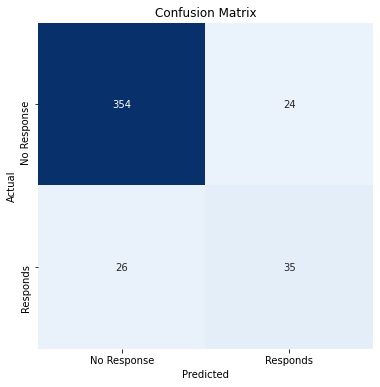


MSE Train:  0.06845407872219053
MSE Test:  0.11389521640091116


 Precision and Recall: 
              precision    recall  f1-score   support

 No Response       0.93      0.94      0.93       378
    Responds       0.59      0.57      0.58        61

    accuracy                           0.89       439
   macro avg       0.76      0.76      0.76       439
weighted avg       0.88      0.89      0.89       439



In [6]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

train, test = train_test_split(dfram, test_size = 0.2, random_state = 21)
#feature selection
X_train, X_test = train[[ 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp5',
       'Year_joined', 'Month_joined', 'Day_joined','Recency']], test[[ 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','AcceptedCmp3',  'AcceptedCmp5',
       'Year_joined', 'Month_joined', 'Day_joined','Recency']]

# X_train, X_test = train.drop(columns = ['Response']), test.drop(columns = ['Response'])
y_train, y_test = train['Response'], test['Response']


clf = MLPClassifier(hidden_layer_sizes=(15,15,),activation="relu",solver = 'sgd', learning_rate_init = 0.3, max_iter = 500, random_state=1)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Train Accuracy: ", clf.score(X_train, y_train))
print("Test Accuracy: ", clf.score(X_test, y_test))


plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



print("\nMSE Train: ", mean_squared_error(array(y_train), clf.predict(X_train)))
print("MSE Test: ", mean_squared_error(array(y_test), y_pred))

print("\n\n Precision and Recall: ")
print(classification_report(y_test, y_pred, target_names = ['No Response','Responds']))

## K-Fold Cross Validation

In [7]:
from sklearn.model_selection import cross_val_score,cross_validate

#Using all original datasets for cross validation 
# data = dfram.drop(columns = ['Response'])
# target = dfram['Response']

CV = cross_validate(clf, X_train, y_train, cv = 10, scoring = ['accuracy','neg_mean_squared_error'], error_score='raise')

In [8]:
print("Accuracy Per Cross Validation: ")
print(CV['test_accuracy'])

ta = CV['test_accuracy']
print("\nAvg Accuracy: ", sum(ta)/10)

print("\nMSE Per Cross Validation: ")
print(abs(CV['test_neg_mean_squared_error']))

mse = abs(CV['test_neg_mean_squared_error'])
print("\nAvg MSE: ", sum(mse)/10)

Accuracy Per Cross Validation: 
[0.83522727 0.875      0.82386364 0.85142857 0.85142857 0.82285714
 0.81142857 0.88       0.85714286 0.84      ]

Avg Accuracy:  0.8448376623376623

MSE Per Cross Validation: 
[0.16477273 0.125      0.17613636 0.14857143 0.14857143 0.17714286
 0.18857143 0.12       0.14285714 0.16      ]

Avg MSE:  0.15516233766233764


## Hyperparameter Tuning

In [9]:
from sklearn.metrics import f1_score
import optuna

def objective(trial):

    activation = trial.suggest_categorical('activation',['logistic', 'tanh', 'relu'])
    solver = trial.suggest_categorical('solver',['sgd', 'adam'])
    alpha=trial.suggest_float("alpha",1e-4,1e3,log=True)
    learning_rate_init=trial.suggest_float("learning_rate_init",0.001,0.5,log=True)
    n_layers = trial.suggest_int('n_layers', 2, 3)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    clf = MLPClassifier(hidden_layer_sizes=tuple(layers),activation=activation ,solver = solver, alpha=alpha, learning_rate_init = learning_rate_init, max_iter = 500, random_state=1)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
trial=study.best_trial
print("Best Tuning Parameters : {} \n with accuracy of : {:.2f} %".format(trial.params,trial.value))

[I 2021-12-04 14:31:30,400] A new study created in memory with name: no-name-092030dd-718d-4497-8174-b745962e8ce8
[I 2021-12-04 14:31:34,178] Trial 0 finished with value: 0.8610478359908884 and parameters: {'activation': 'logistic', 'solver': 'sgd', 'alpha': 119.35780005022963, 'learning_rate_init': 0.0050070264837249615, 'n_layers': 2, 'n_units_0': 53, 'n_units_1': 64}. Best is trial 0 with value: 0.8610478359908884.
[I 2021-12-04 14:31:34,877] Trial 1 finished with value: 0.8610478359908884 and parameters: {'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.004987580034576274, 'learning_rate_init': 0.0087216124004492, 'n_layers': 3, 'n_units_0': 41, 'n_units_1': 77, 'n_units_2': 41}. Best is trial 0 with value: 0.8610478359908884.
[I 2021-12-04 14:31:38,421] Trial 2 finished with value: 0.8610478359908884 and parameters: {'activation': 'logistic', 'solver': 'sgd', 'alpha': 15.359586513666386, 'learning_rate_init': 0.00507315539168967, 'n_layers': 3, 'n_units_0': 49, 'n_units_1': 8

[I 2021-12-04 14:33:26,493] Trial 23 finished with value: 0.8610478359908884 and parameters: {'activation': 'logistic', 'solver': 'adam', 'alpha': 0.001108544547770742, 'learning_rate_init': 0.21543778488406784, 'n_layers': 3, 'n_units_0': 61, 'n_units_1': 87, 'n_units_2': 49}. Best is trial 18 with value: 0.9020501138952164.
[I 2021-12-04 14:33:30,401] Trial 24 finished with value: 0.8929384965831435 and parameters: {'activation': 'relu', 'solver': 'sgd', 'alpha': 0.021134440241775576, 'learning_rate_init': 0.14535430956459025, 'n_layers': 3, 'n_units_0': 88, 'n_units_1': 46, 'n_units_2': 63}. Best is trial 18 with value: 0.9020501138952164.
[I 2021-12-04 14:33:44,424] Trial 25 finished with value: 0.8929384965831435 and parameters: {'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0141433745124119, 'learning_rate_init': 0.01221450607649564, 'n_layers': 3, 'n_units_0': 73, 'n_units_1': 66, 'n_units_2': 84}. Best is trial 18 with value: 0.9020501138952164.
[I 2021-12-04 14:33:45,201] 

[I 2021-12-04 14:35:35,170] Trial 47 finished with value: 0.8610478359908884 and parameters: {'activation': 'relu', 'solver': 'sgd', 'alpha': 19.744233085355255, 'learning_rate_init': 0.0014271160559466518, 'n_layers': 2, 'n_units_0': 45, 'n_units_1': 91}. Best is trial 18 with value: 0.9020501138952164.
/home/matthew/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2021-12-04 14:35:43,545] Trial 48 finished with value: 0.8952164009111617 and parameters: {'activation': 'relu', 'solver': 'sgd', 'alpha': 0.7641542872917811, 'learning_rate_init': 0.011258393622129978, 'n_layers': 2, 'n_units_0': 50, 'n_units_1': 61}. Best is trial 18 with value: 0.9020501138952164.
[I 2021-12-04 14:35:44,865] Trial 49 finished with value: 0.8906605922551253 and parameters: {'activation': 'tanh', 'solver': 'adam', 'alpha': 2.058

[I 2021-12-04 14:37:39,575] Trial 69 finished with value: 0.8952164009111617 and parameters: {'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001874766127753385, 'learning_rate_init': 0.06494627456079335, 'n_layers': 2, 'n_units_0': 62, 'n_units_1': 100}. Best is trial 18 with value: 0.9020501138952164.
[I 2021-12-04 14:37:42,136] Trial 70 finished with value: 0.8861047835990888 and parameters: {'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0004511298962577753, 'learning_rate_init': 0.018979842064268365, 'n_layers': 2, 'n_units_0': 54, 'n_units_1': 90}. Best is trial 18 with value: 0.9020501138952164.
[I 2021-12-04 14:37:47,798] Trial 71 finished with value: 0.8883826879271071 and parameters: {'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00012648788616339315, 'learning_rate_init': 0.004234899897359753, 'n_layers': 3, 'n_units_0': 52, 'n_units_1': 73, 'n_units_2': 44}. Best is trial 18 with value: 0.9020501138952164.
[I 2021-12-04 14:37:51,229] Trial 72 finished with value:

[I 2021-12-04 14:38:52,584] Trial 94 finished with value: 0.8929384965831435 and parameters: {'activation': 'tanh', 'solver': 'adam', 'alpha': 1.269035327370073, 'learning_rate_init': 0.09813395778412241, 'n_layers': 2, 'n_units_0': 34, 'n_units_1': 61}. Best is trial 18 with value: 0.9020501138952164.
[I 2021-12-04 14:38:55,003] Trial 95 finished with value: 0.89749430523918 and parameters: {'activation': 'relu', 'solver': 'adam', 'alpha': 2.7423928908452124, 'learning_rate_init': 0.0010889367993165452, 'n_layers': 2, 'n_units_0': 40, 'n_units_1': 69}. Best is trial 18 with value: 0.9020501138952164.
/home/matthew/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2021-12-04 14:39:05,927] Trial 96 finished with value: 0.8701594533029613 and parameters: {'activation': 'relu', 'solver': 'sgd', 'alpha': 5.768957

Best Tuning Parameters : {'activation': 'tanh', 'solver': 'adam', 'alpha': 0.6549135006192921, 'learning_rate_init': 0.06894158626951814, 'n_layers': 3, 'n_units_0': 58, 'n_units_1': 68, 'n_units_2': 80} 
 with accuracy of : 0.90 %


In [15]:
import optuna
#optuna.visualization.plot_slice(study)

Train Accuracy:  0.9418140330861381
Test Accuracy:  0.9066059225512528


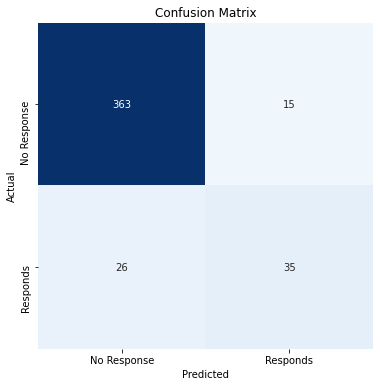


MSE Train:  0.05818596691386195
MSE Test:  0.09339407744874716


 Precision and Recall: 
              precision    recall  f1-score   support

 No Response       0.93      0.96      0.95       378
    Responds       0.70      0.57      0.63        61

    accuracy                           0.91       439
   macro avg       0.82      0.77      0.79       439
weighted avg       0.90      0.91      0.90       439



In [16]:
clf = MLPClassifier(hidden_layer_sizes=(75,43,),activation="relu",solver = 'adam', alpha = 0.1003182605021015, learning_rate_init = 0.01351109170188156, max_iter = 500, random_state=1)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Train Accuracy: ", clf.score(X_train, y_train))
print("Test Accuracy: ", clf.score(X_test, y_test))

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5 , labels=['No Response','Responds'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



print("\nMSE Train: ", mean_squared_error(array(y_train), clf.predict(X_train)))
print("MSE Test: ", mean_squared_error(array(y_test), y_pred))

print("\n\n Precision and Recall: ")
print(classification_report(y_test, y_pred, target_names = ['No Response','Responds']))

## Due to imbalanced class and our sample is not huge, trying Oversampling

In [18]:
from imblearn.over_sampling import RandomOverSampler

print(y_train.value_counts())

ros = RandomOverSampler(random_state=21)
X_os,y_os = ros.fit_resample(X_train, y_train)

print(y_os.value_counts())


clf.fit(X_os, np.asarray(y_os))

print('\nAfter Oversampling\n' )

y_pred = clf.predict(X_test)
print("Test Accuracy: ", clf.score(X_test, y_test))
print("MSE Test: ", mean_squared_error(array(y_test), y_pred))
print(classification_report(y_test, clf.predict(X_test), target_names = ['No Response','Responds']))


0.0    1487
1.0     266
Name: Response, dtype: int64
0.0    1487
1.0    1487
Name: Response, dtype: int64

After Oversampling

Test Accuracy:  0.8451025056947609
MSE Test:  0.1548974943052392
              precision    recall  f1-score   support

 No Response       0.94      0.88      0.91       378
    Responds       0.46      0.64      0.53        61

    accuracy                           0.85       439
   macro avg       0.70      0.76      0.72       439
weighted avg       0.87      0.85      0.86       439



## Hyperparam tuning for oversampling

In [12]:
from sklearn.metrics import f1_score
import optuna

def objective(trial):

    activation = trial.suggest_categorical('activation',['logistic', 'tanh', 'relu'])
    solver = trial.suggest_categorical('solver',['sgd', 'adam'])
    alpha=trial.suggest_float("alpha",1e-4,1e3,log=True)
    learning_rate_init=trial.suggest_float("learning_rate_init",0.001,0.5,log=True)
    n_layers = trial.suggest_int('n_layers', 2, 3)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    clf = MLPClassifier(hidden_layer_sizes=tuple(layers),activation=activation ,solver = solver, alpha=alpha, learning_rate_init = learning_rate_init, max_iter = 500, random_state=1)
    clf.fit(X_os, np.asarray(y_os))
    accuracy = clf.score(X_test, y_test)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
trial=study.best_trial
print("Best Tuning Parameters : {} \n with accuracy of : {:.2f} %".format(trial.params,trial.value))

[I 2021-12-02 00:39:29,135] A new study created in memory with name: no-name-9cc3e114-0304-4a12-8bc7-25238573455e
[I 2021-12-02 00:39:30,904] Trial 0 finished with value: 0.806378132118451 and parameters: {'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0014506849431726975, 'learning_rate_init': 0.04374473765840331, 'n_layers': 3, 'n_units_0': 18, 'n_units_1': 76, 'n_units_2': 22}. Best is trial 0 with value: 0.806378132118451.
[I 2021-12-02 00:39:31,211] Trial 1 finished with value: 0.13895216400911162 and parameters: {'activation': 'tanh', 'solver': 'sgd', 'alpha': 377.8421537236102, 'learning_rate_init': 0.0013969041853617644, 'n_layers': 2, 'n_units_0': 17, 'n_units_1': 90}. Best is trial 0 with value: 0.806378132118451.
[I 2021-12-02 00:39:32,470] Trial 2 finished with value: 0.8451025056947609 and parameters: {'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0007121773990136708, 'learning_rate_init': 0.19265059524612968, 'n_layers': 2, 'n_units_0': 59, 'n_units_1': 81}. 

[I 2021-12-02 00:40:14,728] Trial 25 finished with value: 0.8086560364464692 and parameters: {'activation': 'logistic', 'solver': 'adam', 'alpha': 0.006895836861235392, 'learning_rate_init': 0.0011043075213910097, 'n_layers': 3, 'n_units_0': 75, 'n_units_1': 46, 'n_units_2': 13}. Best is trial 23 with value: 0.8997722095671982.
[I 2021-12-02 00:40:17,616] Trial 26 finished with value: 0.8678815489749431 and parameters: {'activation': 'relu', 'solver': 'adam', 'alpha': 0.17399013342616207, 'learning_rate_init': 0.001715523591041265, 'n_layers': 3, 'n_units_0': 50, 'n_units_1': 54, 'n_units_2': 31}. Best is trial 23 with value: 0.8997722095671982.
[I 2021-12-02 00:40:21,712] Trial 27 finished with value: 0.8132118451025057 and parameters: {'activation': 'relu', 'solver': 'sgd', 'alpha': 2.459991031197081, 'learning_rate_init': 0.007881040528061545, 'n_layers': 3, 'n_units_0': 93, 'n_units_1': 79, 'n_units_2': 12}. Best is trial 23 with value: 0.8997722095671982.
[I 2021-12-02 00:40:23,50

[I 2021-12-02 00:41:22,955] Trial 49 finished with value: 0.8246013667425968 and parameters: {'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.6950778210576388, 'learning_rate_init': 0.016315576751978693, 'n_layers': 3, 'n_units_0': 26, 'n_units_1': 51, 'n_units_2': 27}. Best is trial 23 with value: 0.8997722095671982.
[I 2021-12-02 00:41:25,551] Trial 50 finished with value: 0.806378132118451 and parameters: {'activation': 'logistic', 'solver': 'adam', 'alpha': 0.026407753422705866, 'learning_rate_init': 0.0026936208992277464, 'n_layers': 2, 'n_units_0': 53, 'n_units_1': 3}. Best is trial 23 with value: 0.8997722095671982.
[I 2021-12-02 00:41:28,995] Trial 51 finished with value: 0.8542141230068337 and parameters: {'activation': 'relu', 'solver': 'adam', 'alpha': 1.8697444875500218, 'learning_rate_init': 0.0013587281841296235, 'n_layers': 3, 'n_units_0': 74, 'n_units_1': 35, 'n_units_2': 15}. Best is trial 23 with value: 0.8997722095671982.
[I 2021-12-02 00:41:32,819] Trial 52 finish

[I 2021-12-02 00:42:28,860] Trial 74 finished with value: 0.876993166287016 and parameters: {'activation': 'relu', 'solver': 'adam', 'alpha': 1.160358349847602, 'learning_rate_init': 0.001199401596877843, 'n_layers': 3, 'n_units_0': 77, 'n_units_1': 43, 'n_units_2': 59}. Best is trial 23 with value: 0.8997722095671982.
[I 2021-12-02 00:42:31,149] Trial 75 finished with value: 0.8724373576309795 and parameters: {'activation': 'relu', 'solver': 'adam', 'alpha': 0.2754436058199541, 'learning_rate_init': 0.0014750205087653275, 'n_layers': 3, 'n_units_0': 83, 'n_units_1': 31, 'n_units_2': 62}. Best is trial 23 with value: 0.8997722095671982.
[I 2021-12-02 00:42:32,731] Trial 76 finished with value: 0.7995444191343963 and parameters: {'activation': 'relu', 'solver': 'adam', 'alpha': 0.48156095557297607, 'learning_rate_init': 0.001017750413556579, 'n_layers': 3, 'n_units_0': 4, 'n_units_1': 48, 'n_units_2': 66}. Best is trial 23 with value: 0.8997722095671982.
[I 2021-12-02 00:42:35,020] Tria

[I 2021-12-02 00:43:53,484] Trial 98 finished with value: 0.8792710706150342 and parameters: {'activation': 'relu', 'solver': 'adam', 'alpha': 0.0015143709460735076, 'learning_rate_init': 0.0016815502837194927, 'n_layers': 3, 'n_units_0': 97, 'n_units_1': 53, 'n_units_2': 6}. Best is trial 83 with value: 0.9066059225512528.
/Users/roy/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

[I 2021-12-02 00:44:03,869] Trial 99 finished with value: 0.8496583143507973 and parameters: {'activation': 'tanh', 'solver': 'adam', 'alpha': 0.08577849388022843, 'learning_rate_init': 0.0011491152262522162, 'n_layers': 3, 'n_units_0': 59, 'n_units_1': 52, 'n_units_2': 20}. Best is trial 83 with value: 0.9066059225512528.


Best Tuning Parameters : {'activation': 'relu', 'solver': 'adam', 'alpha': 0.060638234900149024, 'learning_rate_init': 0.002086421193586337, 'n_layers': 3, 'n_units_0': 82, 'n_units_1': 67, 'n_units_2': 55} 
 with accuracy of : 0.91 %


## Oversampling hyperparameter tuning results

Train Accuracy:  0.9903023388476897
Test Accuracy:  0.9066059225512528


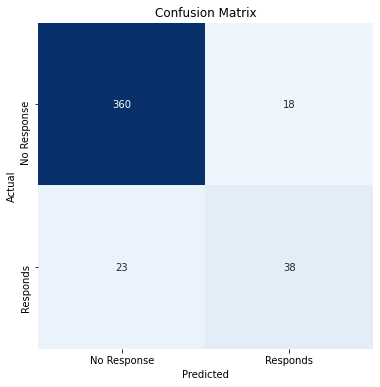

Test Accuracy:  0.9066059225512528
MSE Test:  0.09339407744874716
              precision    recall  f1-score   support

 No Response       0.94      0.95      0.95       378
    Responds       0.68      0.62      0.65        61

    accuracy                           0.91       439
   macro avg       0.81      0.79      0.80       439
weighted avg       0.90      0.91      0.90       439



In [88]:
clf = MLPClassifier(hidden_layer_sizes=(82,67,55,),activation="relu",solver = 'adam', alpha = 0.060638234900149024, learning_rate_init = 0.002086421193586337, max_iter = 500, random_state=1)


clf.fit(X_os, np.asarray(y_os))

y_pred = clf.predict(X_test)
print("Train Accuracy: ", clf.score(X_train, y_train))
print("Test Accuracy: ", clf.score(X_test, y_test))

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5 , labels=['No Response','Responds'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


print("Test Accuracy: ", clf.score(X_test, y_test))
print("MSE Test: ", mean_squared_error(array(y_test), y_pred))
print(classification_report(y_test, clf.predict(X_test), target_names = ['No Response','Responds']))

## Trying Undersampling

In [89]:
from imblearn.under_sampling import RandomUnderSampler 
print(y_train.value_counts())

clf = MLPClassifier(hidden_layer_sizes=(75,43,),activation="relu",solver = 'adam', alpha = 0.1003182605021015, learning_rate_init = 0.01351109170188156, max_iter = 500, random_state=1)

rus = RandomUnderSampler(random_state=21)
X_us,y_us = rus.fit_resample(X_train, y_train)

print(y_us.value_counts())

clf.fit(X_us, np.asarray(y_us))

print('\nAfter Undersampling\n' )

y_pred = clf.predict(X_test)
print("Test Accuracy: ", clf.score(X_test, y_test))
print("MSE Test: ", mean_squared_error(array(y_test), y_pred))
print(classification_report(y_test, clf.predict(X_test), target_names = ['No Response','Responds']))


0.0    1487
1.0     266
Name: Response, dtype: int64
0.0    266
1.0    266
Name: Response, dtype: int64

After Undersampling

Test Accuracy:  0.8633257403189066
MSE Test:  0.1366742596810934
              precision    recall  f1-score   support

 No Response       0.93      0.90      0.92       378
    Responds       0.51      0.61      0.55        61

    accuracy                           0.86       439
   macro avg       0.72      0.76      0.74       439
weighted avg       0.88      0.86      0.87       439



## Hyperparam tuning for undersampling

In [90]:
from sklearn.metrics import f1_score
import optuna

def objective(trial):

    activation = trial.suggest_categorical('activation',['logistic', 'tanh', 'relu'])
    solver = trial.suggest_categorical('solver',['sgd', 'adam'])
    alpha=trial.suggest_float("alpha",1e-4,1e3,log=True)
    learning_rate_init=trial.suggest_float("learning_rate_init",0.001,0.5,log=True)
    n_layers = trial.suggest_int('n_layers', 2, 3)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

    clf = MLPClassifier(hidden_layer_sizes=tuple(layers),activation=activation ,solver = solver, alpha=alpha, learning_rate_init = learning_rate_init, max_iter = 500, random_state=1)
    clf.fit(X_us, np.asarray(y_us))
    accuracy = clf.score(X_test, y_test)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
trial=study.best_trial
print("Best Tuning Parameters : {} \n with accuracy of : {:.2f} %".format(trial.params,trial.value))

[I 2021-12-04 18:15:57,383] A new study created in memory with name: no-name-87259cce-2cc6-4462-8954-dbd16175977d
[I 2021-12-04 18:15:57,851] Trial 0 finished with value: 0.7289293849658315 and parameters: {'activation': 'relu', 'solver': 'adam', 'alpha': 1.5509078087580659, 'learning_rate_init': 0.037732501017779294, 'n_layers': 2, 'n_units_0': 9, 'n_units_1': 67}. Best is trial 0 with value: 0.7289293849658315.
[I 2021-12-04 18:15:58,505] Trial 1 finished with value: 0.13895216400911162 and parameters: {'activation': 'logistic', 'solver': 'adam', 'alpha': 744.8836031993811, 'learning_rate_init': 0.018850645157086763, 'n_layers': 3, 'n_units_0': 4, 'n_units_1': 96, 'n_units_2': 100}. Best is trial 0 with value: 0.7289293849658315.
[I 2021-12-04 18:15:59,388] Trial 2 finished with value: 0.7927107061503417 and parameters: {'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004683046413508604, 'learning_rate_init': 0.012839108074031014, 'n_layers': 2, 'n_units_0': 27, 'n_units_1': 7}. 

[I 2021-12-04 18:16:24,502] Trial 24 finished with value: 0.7585421412300684 and parameters: {'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001594084872825783, 'learning_rate_init': 0.08241799171676349, 'n_layers': 2, 'n_units_0': 31, 'n_units_1': 59}. Best is trial 20 with value: 0.8929384965831435.
[I 2021-12-04 18:16:24,756] Trial 25 finished with value: 0.13895216400911162 and parameters: {'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006898485014832261, 'learning_rate_init': 0.21078753400773192, 'n_layers': 2, 'n_units_0': 100, 'n_units_1': 75}. Best is trial 20 with value: 0.8929384965831435.
/home/matthew/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2021-12-04 18:16:28,985] Trial 26 finished with value: 0.7972665148063781 and parameters: {'activation': 'tanh', 'solver': 'sgd', 'alpha':

[I 2021-12-04 18:16:42,146] Trial 49 finished with value: 0.13895216400911162 and parameters: {'activation': 'relu', 'solver': 'sgd', 'alpha': 257.4196434222991, 'learning_rate_init': 0.002389311206367655, 'n_layers': 3, 'n_units_0': 42, 'n_units_1': 54, 'n_units_2': 20}. Best is trial 20 with value: 0.8929384965831435.
[I 2021-12-04 18:16:42,343] Trial 50 finished with value: 0.13895216400911162 and parameters: {'activation': 'logistic', 'solver': 'sgd', 'alpha': 50.24938826382917, 'learning_rate_init': 0.12834729577985585, 'n_layers': 3, 'n_units_0': 12, 'n_units_1': 20, 'n_units_2': 42}. Best is trial 20 with value: 0.8929384965831435.
[I 2021-12-04 18:16:43,084] Trial 51 finished with value: 0.8610478359908884 and parameters: {'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001706603374492939, 'learning_rate_init': 0.1633938792564562, 'n_layers': 3, 'n_units_0': 37, 'n_units_1': 39, 'n_units_2': 2}. Best is trial 20 with value: 0.8929384965831435.
[I 2021-12-04 18:16:43,274] Tr

[I 2021-12-04 18:16:59,663] Trial 74 finished with value: 0.13895216400911162 and parameters: {'activation': 'relu', 'solver': 'sgd', 'alpha': 521.7502347376746, 'learning_rate_init': 0.12092997490092629, 'n_layers': 3, 'n_units_0': 53, 'n_units_1': 50, 'n_units_2': 1}. Best is trial 20 with value: 0.8929384965831435.
[I 2021-12-04 18:16:59,958] Trial 75 finished with value: 0.8610478359908884 and parameters: {'activation': 'tanh', 'solver': 'adam', 'alpha': 10.64600091743978, 'learning_rate_init': 0.08816065970898476, 'n_layers': 2, 'n_units_0': 78, 'n_units_1': 13}. Best is trial 20 with value: 0.8929384965831435.
[I 2021-12-04 18:17:00,371] Trial 76 finished with value: 0.13895216400911162 and parameters: {'activation': 'tanh', 'solver': 'adam', 'alpha': 16.227714558434837, 'learning_rate_init': 0.3473720827483858, 'n_layers': 2, 'n_units_0': 97, 'n_units_1': 82}. Best is trial 20 with value: 0.8929384965831435.
[I 2021-12-04 18:17:01,515] Trial 77 finished with value: 0.13895216400

[I 2021-12-04 18:17:15,885] Trial 99 finished with value: 0.8610478359908884 and parameters: {'activation': 'relu', 'solver': 'sgd', 'alpha': 57.82016201847197, 'learning_rate_init': 0.014830054751445181, 'n_layers': 3, 'n_units_0': 44, 'n_units_1': 53, 'n_units_2': 94}. Best is trial 20 with value: 0.8929384965831435.


Best Tuning Parameters : {'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006595041584502584, 'learning_rate_init': 0.18913808210499217, 'n_layers': 2, 'n_units_0': 87, 'n_units_1': 76} 
 with accuracy of : 0.89 %


## Checking hyperparam undersampling results

Train Accuracy:  0.6766917293233082
Test Accuracy:  0.8883826879271071
MSE Test:  0.11161731207289294


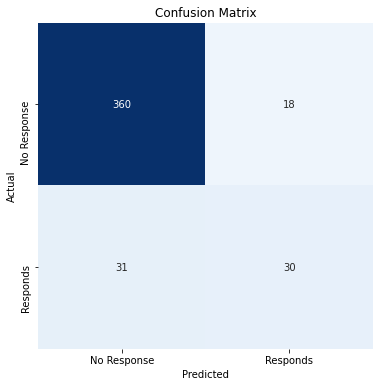

              precision    recall  f1-score   support

 No Response       0.92      0.95      0.94       378
    Responds       0.62      0.49      0.55        61

    accuracy                           0.89       439
   macro avg       0.77      0.72      0.74       439
weighted avg       0.88      0.89      0.88       439



In [91]:
clf = MLPClassifier(hidden_layer_sizes=(100,99,),activation="relu",solver = 'adam', alpha = 7.772046851402521, learning_rate_init = 0.15808530487217196, max_iter = 500, random_state=1)
# clf = MLPClassifier(hidden_layer_sizes=(90,28,13,67),activation="tanh",solver = 'adam', alpha = 0.0023187496276111676, learning_rate_init = 0.029175888278947175, max_iter = 500, random_state=1)

# Actually plugging in 12,3 gives us the sweet spot for Train accuracy, test accuracy, but more importantly an even precision and recall
# clf = MLPClassifier(hidden_layer_sizes=(12,3),activation = 'logistic', solver = 'sgd', max_iter = 500, random_state = 21)
 
clf.fit(X_us, np.asarray(y_us))

y_pred = clf.predict(X_test)
print("Train Accuracy: ", clf.score(X_us, np.asarray(y_us)))
print("Test Accuracy: ", clf.score(X_test, y_test))
print("MSE Test: ", mean_squared_error(array(y_test), y_pred))

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5 , labels=['No Response','Responds'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


print(classification_report(y_test, clf.predict(X_test), target_names = ['No Response','Responds']))

## Trying Dense NN

In [92]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
#can definetely try keras keras tuning to target higher f1

input_dnn = tf.keras.Input(shape=(X_os.shape[1],))
x = tf.keras.layers.Dense(256, activation='relu')(input_dnn)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output_dnn = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.Model(inputs=input_dnn, outputs=output_dnn)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        'mse'
    ]
)

history = model.fit(
    X_os,
    np.asarray(y_os),
    validation_split=0.2,
    batch_size=25,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)



Epoch 1/100
96/96 [==============================] - 1s 3ms/step - loss: 0.5068 - accuracy: 0.7465 - mse: 0.1692 - val_loss: 0.9479 - val_accuracy: 0.4403 - val_mse: 0.3476
Epoch 2/100
96/96 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8033 - mse: 0.1358 - val_loss: 0.7020 - val_accuracy: 0.6017 - val_mse: 0.2477
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8033 - mse: 0.1332 - val_loss: 0.5549 - val_accuracy: 0.6992 - val_mse: 0.1884
Epoch 4/100
96/96 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8100 - mse: 0.1279 - val_loss: 0.6553 - val_accuracy: 0.6286 - val_mse: 0.2254
Epoch 5/100
96/96 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8209 - mse: 0.1222 - val_loss: 0.6162 - val_accuracy: 0.6723 - val_mse: 0.2089
Epoch 6/100
96/96 [==============================] - 0s 2ms/step - loss: 0.3651 - accuracy: 0.8348 - mse: 0.1164 - val_loss: 0.5511 - v

In [93]:
results = model.evaluate(X_test, y_test, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]))
print("Test MSE: {:.5f}".format(results[2]))


Test Loss: 0.45001
Test Accuracy: 0.80%
Test MSE: 0.14053


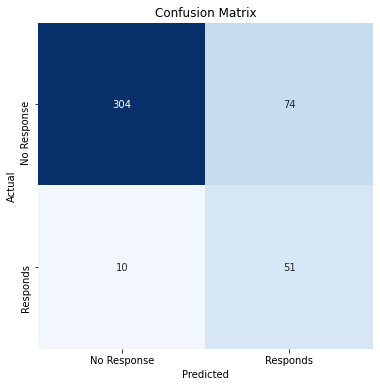

In [46]:
y_pred = np.array(model.predict(X_test) >= 0.5, dtype=np.int)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=['No Response','Responds'])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [23]:
# follow up work, hyper tuning using keras tuner and f-1 accuracy using hyperband

In [17]:
# # Source obtained this method from https://neptune.ai/blog/keras-tuner-tuning-hyperparameters-deep-learning-model





# def model_builder(hp):
    
#     # defining a set of hyperparametrs for tuning and a range of values for each
    
#     model = tf.keras.Model(inputs=input_dnn, outputs=output_dnn)
#     model.add(keras.layers.Dense(
#       hp.Choice('units', [8, 16, 32]),
#       activation='relu'))
    
#     model.add(keras.layers.Dense(1, activation='relu'))
    
#     # model compilation
#     model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['accuracy','f1',' precision','recall',]
# )

#     return model

# tuner = kt.Hyperband(hypermodel = model_builder,
#                      objective = kt.Objective("val_f1", direction="max"),
#                      max_epochs = 20,
#                      project_name='hyperband_tuner')



# tuner.search(scaler.transform(X_os), np.asarray(y_os), epochs=100, validation_data=(X_test, y_test))

        
# tuner.results_summary()


In [26]:
# take a look at mse graph and do k fold cross validation for avg mse

In [141]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K




def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 8)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=1, max_value=150),
                activation=hp.Choice("activation", ["relu", "tanh","sigmoid"]),
            )
        )
    model.add(layers.Dense(1, activation="sigmoid"))
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate= hp.Float("dropout_rate",min_value = 0.0, max_value = 0.7)))
    learning_rate = hp.Float("lr",0.001,0.7, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=[f1_m],
    )
    return model

# tuner initialization
betterfs1tuner = kt.Hyperband(hypermodel = build_model,
                     objective = kt.Objective("val_f1_m", direction="max"),
                     max_epochs = 150,
                     project_name='hyperband_tuner17')

betterfs1tunerOS = kt.Hyperband(hypermodel = build_model,
                     objective = kt.Objective("val_f1_m", direction="max"),
                     max_epochs = 150,
                     project_name='hyperband_tunerOS')

betterfs1tunerUS = kt.Hyperband(hypermodel = build_model,
                     objective = kt.Objective("val_f1_m", direction="max"),
                     max_epochs = 150,
                     project_name='hyperband_tunerUS')

betterfs1tuner.search(X_train, y_train, epochs=150, validation_data=(X_test, y_test))

betterfs1tunerOS.search(X_os, y_os, epochs=150, validation_data=(X_test, y_test))

betterfs1tunerUS.search(X_us, y_us, epochs=150, validation_data=(X_test, y_test))

betterfs1tuner.results_summary()

print("************************************************************************************************")

betterfs1tunerOS.results_summary()

print("************************************************************************************************")

betterfs1tunerUS.results_summary()


# Best hp for fs1



Trial 254 Complete [00h 00m 16s]
val_f1_m: 0.6193476319313049

Best val_f1_m So Far: 0.6462149620056152
Total elapsed time: 00h 09m 42s
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Oracle triggered exit
Results summary
Results in ./hyperband_tuner17
Showing 10 best trials
Objective(name='val_f1_m', direction='max')
Trial summary
Hyperparameters:
num_layers: 7
units_0: 57
activation: relu
dropout: False
lr: 0.00740837684630626
units_1: 35
units_2: 83
dropout_rate: 0.465040968468216
units_3: 132
units_4: 121
units_5: 140
units_6: 139
units_7: 26
tuner/epochs: 150
tuner/initial_epoch: 50
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 292fff2e949b53e520715f8e3f1a9fd0
Score: 0.6462149620056152
Trial summary
Hyperparameters:
num_layers: 4
units_0: 89
activation: relu
dropout: False
lr: 0.01651516706560194
units_1: 20
units_2: 29
dropout_rate: 0.5028994906471833
units_3: 7
units_4: 62
units_5: 47
units_6: 71
units_7: 124
tuner/epochs: 150
tuner/

Hyperparameters:
num_layers: 1
units_0: 52
activation: relu
dropout: False
lr: 0.0018084480464569503
units_1: 3
units_2: 19
units_3: 24
dropout_rate: 0.35000000000000003
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.7182466387748718

def create_model():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=60, activation='relu', kernel_constraint=maxnorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(30, activation='relu', kernel_constraint=maxnorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(lr=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model
 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=300, batch_size=16, verbose=0)))

In [154]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold



# Original dataset model
input_dnn = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(38, input_dim = 38, activation='relu')(input_dnn)
x = tf.keras.layers.Dense(65, activation='relu')(x)
x = tf.keras.layers.Dense(63, activation='relu')(x)
output_dnn = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.Model(inputs=input_dnn, outputs=output_dnn)


model.compile(
    optimizer= SGD(learning_rate= 0.05634684341799796),
    loss='binary_crossentropy',
    metrics=[
        f1_m
    ]
)

history = model.fit(
    X_test,
    np.asarray(y_test),
    validation_split=0.2,
    batch_size=10,
    epochs=30,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=30,
            restore_best_weights=True
        )
    ]
)

# Oversampled model

input_dnnOS = tf.keras.Input(shape=(X_os.shape[1],))
y = tf.keras.layers.Dense(134, input_dim = 134, activation='sigmoid')(input_dnnOS)
y = tf.keras.layers.Dense(95, activation='sigmoid')(y)
y = tf.keras.layers.Dense(24, activation='sigmoid')(y)
y = tf.keras.layers.Dropout(0.278914187664643)(y)
output_dnnOS = tf.keras.layers.Dense(1, activation='sigmoid')(y)


modelOS = tf.keras.Model(inputs=input_dnnOS, outputs=output_dnnOS)


modelOS.compile(
    optimizer= SGD(learning_rate= 0.007930273997838832),
    loss='binary_crossentropy',
    metrics=[
        f1_m
    ]
)

historyOS = modelOS.fit(
    X_test,
    np.asarray(y_test),
    validation_split=0.2,
    batch_size=10,
    epochs=30,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=30,
            restore_best_weights=True
        )
    ]
)


# Undersampled

input_dnnUS = tf.keras.Input(shape=(X_us.shape[1],))
z = tf.keras.layers.Dense(143, input_dim = 143, activation='tanh')(input_dnnUS)
z = tf.keras.layers.Dense(98, activation='tanh')(z)
z = tf.keras.layers.Dense(59, activation='tanh')(z)
z = tf.keras.layers.Dropout(0.2710414568336578)(z)
output_dnnUS = tf.keras.layers.Dense(1, activation='sigmoid')(z)


modelUS = tf.keras.Model(inputs=input_dnnUS, outputs=output_dnnUS)


modelUS.compile(
    optimizer= SGD(learning_rate= 0.005090297670558764),
    loss='binary_crossentropy',
    metrics=[
        f1_m
    ]
)

historyUS = modelUS.fit(
    X_test,
    np.asarray(y_test),
    validation_split=0.2,
    batch_size=10,
    epochs=30,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=30,
            restore_best_weights=True
        )
    ]
)




Epoch 1/30
36/36 [==============================] - 0s 4ms/step - loss: 0.4884 - f1_m: 0.0000e+00 - val_loss: 0.3182 - val_f1_m: 0.0000e+00
Epoch 2/30
36/36 [==============================] - 0s 2ms/step - loss: 0.4067 - f1_m: 0.0000e+00 - val_loss: 0.2996 - val_f1_m: 0.0000e+00
Epoch 3/30
36/36 [==============================] - 0s 2ms/step - loss: 0.3735 - f1_m: 0.0000e+00 - val_loss: 0.2639 - val_f1_m: 0.0000e+00
Epoch 4/30
36/36 [==============================] - 0s 2ms/step - loss: 0.3435 - f1_m: 0.0185 - val_loss: 0.2560 - val_f1_m: 0.1852
Epoch 5/30
36/36 [==============================] - 0s 2ms/step - loss: 0.3106 - f1_m: 0.1417 - val_loss: 0.2297 - val_f1_m: 0.1852
Epoch 6/30
36/36 [==============================] - 0s 1ms/step - loss: 0.2922 - f1_m: 0.3528 - val_loss: 0.2302 - val_f1_m: 0.1852
Epoch 7/30
36/36 [==============================] - 0s 2ms/step - loss: 0.2806 - f1_m: 0.3264 - val_loss: 0.7690 - val_f1_m: 0.2376
Epoch 8/30
36/36 [==============================] - 

Epoch 1/30
36/36 [==============================] - 0s 4ms/step - loss: 0.5673 - f1_m: 0.0562 - val_loss: 0.4148 - val_f1_m: 0.0000e+00
Epoch 2/30
36/36 [==============================] - 0s 2ms/step - loss: 0.4431 - f1_m: 0.0000e+00 - val_loss: 0.3375 - val_f1_m: 0.0000e+00
Epoch 3/30
36/36 [==============================] - 0s 2ms/step - loss: 0.4101 - f1_m: 0.0000e+00 - val_loss: 0.3137 - val_f1_m: 0.0000e+00
Epoch 4/30
36/36 [==============================] - 0s 2ms/step - loss: 0.3939 - f1_m: 0.0000e+00 - val_loss: 0.3012 - val_f1_m: 0.0000e+00
Epoch 5/30
36/36 [==============================] - 0s 2ms/step - loss: 0.3838 - f1_m: 0.0000e+00 - val_loss: 0.2950 - val_f1_m: 0.0000e+00
Epoch 6/30
36/36 [==============================] - 0s 2ms/step - loss: 0.3750 - f1_m: 0.0000e+00 - val_loss: 0.2858 - val_f1_m: 0.0000e+00
Epoch 7/30
36/36 [==============================] - 0s 2ms/step - loss: 0.3616 - f1_m: 0.0000e+00 - val_loss: 0.2810 - val_f1_m: 0.0000e+00
Epoch 8/30
36/36 [======

In [155]:
results = model.evaluate(X_test, y_test, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test F1: {:.5f}%".format(results[1]))
# print("Test MSE: {:.5f}".format(results[2]))

results = modelOS.evaluate(X_test, y_test, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test F1: {:.5f}%".format(results[1]))

results = modelUS.evaluate(X_test, y_test, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test F1: {:.5f}%".format(results[1]))



Test Loss: 0.21327
Test F1: 0.63783%
Test Loss: 0.40308
Test F1: 0.00000%
Test Loss: 0.26376
Test F1: 0.50041%
